## Descriptive statistics: Quantities describing distribution functions

- [Recap on quantities describing distribution functions](#Descriptive)
    * I. [Population Statistics](#I.-Population-statistics)
    * II. [Sample Statistics](#II.-Sample-statistics)
    * III. [Bias of an estimator](#III.-Bias-of-an-estimator:)
    * IV. [Statistics of multivariate distributions](#IV.-Statistics-of-multivariate-distributions:)
    * V. [Change of variable](#V.-Change-of-variable)

- [References and supplementary material](#X.-References-and-supplementary-material:)

In [1]:
#Modules to be used in this notebook
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
#%matplotlib inline    # No need to use %matplotlib inline if I use plt.show after running my code !

# Recap on quantities describing distribution functions   <a class="anchor" id="Descriptive"></a>



## I. Population statistics

These are the quantities that allow to define the "location", "shape" and "width" of a distribution $h(x)$. Note here that we consider a description of the "true" (population) distribution, this why we use the notation $h(x)$ (i.e. this is NOT the distribution we infer from the data but the true underlying distribution). 

In [2]:
# Let's illustrate those quantities with a gaussian distribution
x = np.arange(-6,6,0.01) # Array over which I will estimate some properties of my gaussian
g = scipy.stats.norm()  # Instance of a gaussian distribution

### Arithmetic mean (also known expectation value):

$$
\mu \, =\, E(x) \, = \, \int_{-\infty}^{+\infty} x\,h(x)\,{\rm d}x
$$

Note that the "expected/expectation value " is also often writen $<x>$.  

In [3]:
g.mean()  #Arithmetic mean of our gaussian distribution

0.0

### Variance

$$
V \, = \, \sigma^2 \, = \, \int_{-\infty}^{+\infty} (x-\mu)^2\,h(x)\,{\rm d}x
$$

In [4]:
g.var()  #Variance of our gaussian distribution

1.0

### Standard deviation

$$
\sigma \, = \, \sqrt{V}
$$

In [5]:
g.std()  #Standard deviation of our gaussian distribution

1.0

### Skewness

$$
\Sigma = \int_{-\infty}^{+\infty} \left( \frac{x-\mu}{\sigma}\right)^3\,h(x)\,{\rm d}x
$$

Skweness describes how "asymmetric" is the distribution

In [6]:
# It is not a property of the distribution in scipy.stats. 
# But you can use scipy.stats.skew() to calculate skewness of a data set (SAMPLE statistics ; see below)
y_gauss_samp = g.rvs(1000000)  # I generate a (large) random sample following a gaussian distrib
scipy.stats.skew(y_gauss_samp)  #Skewness of our gaussian distribution 

-0.003256148806639254

### Kurtosis

$$
K \, = \, \int_{-\infty}^{+\infty} \left( \frac{x-\mu}{\sigma}\right)^4\,h(x)\,{\rm d}x - 3
$$

Kurtosis describes how "peaky" is the distribution (note the subtraction by 3 which allows us to have K=0 for a gaussian distribution). Kurtosis > 0 means that the distribution if more peaked than a gaussian. 

In [7]:
# It is not a property of the distribution in scipy.stats
# But you can use scipy.stats.kurtosis() to calculate kurtosis of a data set  (SAMPLE statistics ; see below)
scipy.stats.kurtosis(y_gauss_samp)  #Kurtosis of our gaussian distribution 

-0.011252893218435922

### Median

$$
\frac{1}{2} \, = \, \int_{-\infty}^{median} \, h(x)\, {\rm d}x
$$

In [8]:
g.median()    # Median of the gaussian distribution

0.0

### Moment of order k

The moment of order k is defined analogously to the mean (central moment of order 1):
$$
\mu^{\prime}_k \, = E(x^k) = \, \int_{-\infty}^{+\infty} x^k\,h(x)\,{\rm d}x
$$

In [9]:
# The function g.moment() return the moment of the distrib. 
g2 = scipy.stats.norm(2, 1)
for k in range(1,5):
    print('Moment of order %i = %.2f' %(k, g2.moment(k)))

Moment of order 1 = 2.00
Moment of order 2 = 5.00
Moment of order 3 = 14.00
Moment of order 4 = 43.00


### Central moment of order k

The central moments of order $k$ are defined analogously to the variance of the distribution (central moment of order $k=2$):
$$
\mu_k \, = \, E((x-\mu^\prime_1)^k) \, = \int_{-\infty}^{+\infty} (x-\mu)^k\,h(x)\,{\rm d}x
$$

In [10]:
# To get the central moments, we need to shift our distribution to its mean => fix the mean to 0
# Let's take a distribution with sigma = 2
g3 = scipy.stats.norm(0, 2)
for k in range(1,5):
    print('Moment of order %i = %.2f' %(k, g3.moment(k)))

Moment of order 1 = 0.00
Moment of order 2 = 4.00
Moment of order 3 = 0.00
Moment of order 4 = 48.00


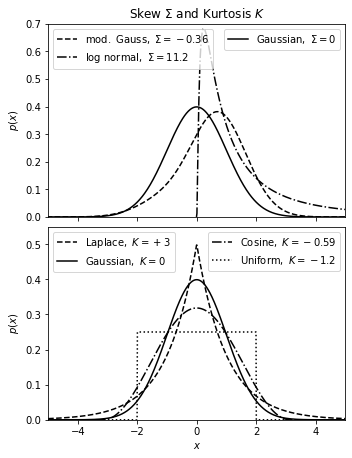

In [11]:
# Figure 3.6 from "Statistics, Data Mining, and Machine Learning in Astronomy"
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(5, 6.25))
fig.subplots_adjust(right=0.95, hspace=0.05, bottom=0.07, top=0.95)

# First show distributions with different skeq
ax = fig.add_subplot(211)
x = np.linspace(-8, 8, 1000)
N = scipy.stats.norm(0, 1)

l1, = ax.plot(x, N.pdf(x), '-k',
              label=r'${\rm Gaussian,}\ \Sigma=0$')

l2, = ax.plot(x, 0.5 * N.pdf(x) * (2 + x + 0.5 * (x * x - 1)),
              '--k', label=r'${\rm mod.\ Gauss,}\ \Sigma=-0.36$')
l3, = ax.plot(x[499:], scipy.stats.lognorm(1.2).pdf(x[499:]), '-.k',
              label=r'$\rm log\ normal,\ \Sigma=11.2$')

ax.set_xlim(-5, 5)
ax.set_ylim(0, 0.7001)
ax.set_ylabel('$p(x)$')
ax.xaxis.set_major_formatter(plt.NullFormatter())

# trick to show multiple legends
leg1 = ax.legend([l1], [l1.get_label()], loc=1)
leg2 = ax.legend([l2, l3], (l2.get_label(), l3.get_label()), loc=2)
ax.add_artist(leg1)
ax.set_title('Skew $\Sigma$ and Kurtosis $K$')

# next show distributions with different kurtosis
ax = fig.add_subplot(212)
x = np.linspace(-5, 5, 1000)
l1, = ax.plot(x, scipy.stats.laplace(0, 1).pdf(x), '--k',
              label=r'${\rm Laplace,}\ K=+3$')
l2, = ax.plot(x, scipy.stats.norm(0, 1).pdf(x), '-k',
              label=r'${\rm Gaussian,}\ K=0$')
l3, = ax.plot(x, scipy.stats.cosine(0, 1).pdf(x), '-.k',
              label=r'${\rm Cosine,}\ K=-0.59$')
l4, = ax.plot(x, scipy.stats.uniform(-2, 4).pdf(x), ':k',
              label=r'${\rm Uniform,}\ K=-1.2$')

ax.set_xlim(-5, 5)
ax.set_ylim(0, 0.55)
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')

# trick to show multiple legends
leg1 = ax.legend((l1, l2), (l1.get_label(), l2.get_label()), loc=2)
leg2 = ax.legend((l3, l4), (l3.get_label(), l4.get_label()), loc=1)
ax.add_artist(leg1)

plt.show()

An example of distributions with different skewness $\Sigma$ (top panel) and kurtosis $K$ (bottom panel). The modified Gaussian in the upper panel is a normal distribution multiplied by a Gram-Charlier series, with $a_0 = 2$, $a_1 = 1$, and $a_2 = 0.5$. The log-normal has $\sigma = 1.2$.

## II. Sample statistics

We speak of **sample statistics** when the quantities described above are directly deduced **from the data** (we will rediscuss this further in the lectures dedicated to statistical inference). If we assume that we have $N$ measurements ${x_i}$, then we can calculate **estimators** of the various quantities (assuming for the moment that the uncertainty of $x_i$ is negligible - a measurement of $x$ is a delta function-, or at least much smaller than the range of $x_i$) describing the pdf.  

### Estimator of the mean:    

$$
\hat{\mu} \, =\, {\bar{x}} = \sum_{i=1}^{N} \frac{x_i}{N}
$$

There is various notations for the estimator of the mean. Our [book](#book) uses $\bar{x}$, but I prefer the abusive notation that adds a "hat" ($\hat{ }$) on top of the estimated quantity (i.e. estimated based on the data). You may also find $\hat{x}$ for the estimator of the mean. This is an "abusive notation" because ${\hat{\theta}}$ is in principle reserved (in books of statistics) to the MLE (maximum likelihood) estimator of a parameter. In many situations, both are identical (e.g. estimator mean of a gaussian is equal to its MLE estimator).

In [12]:
# If we take a canonical normal distribution 
g = scipy.stats.norm(0, 1)
# The mean of the distribution is: 
print('The mean of the distribution is %.2f' %g.mean())
# The sample mean can be calculated for a sample drawn from that distribution; let's take a sample of 10 values
y_samp = g.rvs(10)
print('The estimator of the mean for my sample y_samp of 10 points is %.2f' %y_samp.mean())

The mean of the distribution is 0.00
The estimator of the mean for my sample y_samp of 10 points is -0.07


### Estimator of the Standard deviation:

$$
\hat{\sigma} = \,s \, = \sqrt{\frac{1}{N-1}} \, \sqrt{ \sum_{i=1}^{N} (x_i-\bar{x})^2} 
$$

Note here the factor N-1 because, said shortly, we have already used 1 d.o.f.  to estimate ${\bar{x}}$. Thanks to this "correction", $s^2$ is an *unbiased* estimator of the variance. 

Also, keep in mind that $s$ IS NOT the error on $\bar{x}$. The error on $\bar{x}$ is given by the **standard error on the mean** which is given (for large $N$ and ${\bar{x}}$ following a gaussian distrib.) by:    
$$
stde = \sigma_{\bar{x}}= \frac{s}{\sqrt{N}}
$$

This is a **consequence of the central limit theorem** (i.e. when independent random variables are added, their sum tends toward a normal distribution even if the original variables themselves are not normally distributed): for a population (sample) drawn from a distribution $h(x)$ (of finite width / variance), the mean of $N$ values drawn from that distribution follow a Gaussian $N\left(\mu, \frac{\sigma}{\sqrt{N}}\right)$

In [13]:
# The mean of the distribution is: 
print('The std of the distribution is %.2f' %g.std())
# The sample std can be calculated for a sample drawn from that distribution; let's take a sample of 10 values
print('The estimator of the std for my sample y_samp of 10 points is %.2f' %y_samp.std(ddof=1))

The std of the distribution is 1.00
The estimator of the std for my sample y_samp of 10 points is 1.16


### ABOUT VARIANCE and std calculation by NUMPY:

The variance in numpy is the average of the squared deviations from the mean, i.e., $\sigma^2 = mean(abs(x -$ `x.mean()`$)^2)$, where the mean is calculated as `x.sum()`$/ N$, where $N = $`len(x)`. If, however, `ddof` is specified (i.e. `np.var(x, ddof)`), the divisor $N - {\rm ddof}$ is used instead.

=> If you want to have $N-1$ at the denominator use `np.var(x, ddof=1)`. By default ddof=0. The same is true for the calculation of the standard deviation  `np.std(x, ddof=1)`. 

## III. Bias of an estimator:

An estimator is called biased, if its value does not converge to the "truth" (i.e. to the quantity it estimates as derived knowing the true distribution). The bias is defined as the *expectation value* (i.e. average) of the difference between an estimator and its population value:

$$
bias(\hat{q}) \, = \, E(\hat{q} - q) \, = <\,\hat{q} - q \,> 
$$
where $q$ represents any statistical quantity, and $\hat{q}$ its estimator. 

In addition to the bias, estimators are also characterized by some *variance* $V$. The *mean squared error* is often used to judge the quality of an estimator: 

$$
{\rm MSE} \, = \, V + bias^2(\hat{q})
$$

Note also that statisticians also speak of "consistency" of an estimator, which is different from the bias. An estimator is called consistent if its value, obtained for an infinitely large sample, converges to its "true" value, and its variance $V$ vanishes. Surprisingly, an estimator can be unbiased, but not consistent. Imagine that you estimate the mean of your sample simply based on the first value you measure (this won't -generally- be a maximum likelihood estimator but you can do this !). Then, even if ~~your sample becomes infinitely large~~ you repeat your experiment an infinitely large number of times, the expectation value of the mean converges to 0 but the expectation of the variance will not. 

## IV. Statistics of multivariate distributions:

We won't have time to explore those in details, nor the generalization to more than 2 random variables. You could e.g. consult Sect. 3.5 and 3.6 of our reference [book](#book) to learn more about multivariate statistics. (see also [Sect. I.4b of Basic-statistics_01.ipynb](Basic-statistics_01.ipynb) ) 

In short, the concepts introduced for univariate distribution are easily extended in 2D and N-D. For example, a 2-D pdf $h(x,y)$ represents the probability for $x$ to be in $[x+{\rm d}x[$ **and** for $y$ to be in $[y+{\rm d}y[$. In addition, we should have $\int_{-\infty}^{+\infty} \int_{-\infty}^{+\infty} \, h(x,y) \, {\rm d}x {\rm d}y = 1$. 

In analogy to univariate distribution, we have the mean and variance defined for $x$ that are:    

$$
\mu_x \, = \, \int_{-\infty}^{+\infty} \int_{-\infty}^{+\infty} \, x \, h(x,y) \, {\rm d}x {\rm d}y 
$$

and 

$$
V_x \, = \, \int_{-\infty}^{+\infty} \int_{-\infty}^{+\infty} \, (x-\mu_x)^2 \, h(x,y) \, {\rm d}x {\rm d}y 
$$

The same quantities are defined for $y$. 

The co-variance, that expresses the dependence between $x$ and $y$, is calculated as:

$$
V_{xy} \, = \, \int_{-\infty}^{+\infty} \int_{-\infty}^{+\infty} \, (x-\mu_x)(x-\mu_y) \, h(x,y) \, {\rm d}x {\rm d}y 
$$

This *covariance* is also written $Cov(x,y)$, and is equal to zero when two variables are independent. 

## V. Change of variable

It is often necessary to change a probability distribution $h(x)$ into a probability distribution $g(y)$, where $y$ is a function of $x$. For a continuous function, we can write:

$$
h(x)\,{\rm{d}}x = g(y){\rm{d}}y
$$

Indeed, the probability has to be conserved by the change of variable. Consequently, the transformation of the probabilities is just the same as for normal functions:

$$
h(x) = g(y(x)) \, \left| \frac{{\rm{d}}y}{{\rm{d}}x} \right|
$$

# X. References and supplementary material:

Chapter 3 (3.2) of the book *Statistics, data mining and Machine learning in astronomy* by Z. Ivezic et al. in Princeton Series in Modern Astronomy.

*All of statistics: a concise course in statistical inference*, Wasserman 2004 (see also errata in http://www.stat.cmu.edu/~larry/all-of-statistics/).

Numerical recipes by Press et al. Cambridge University press: Chapter 14